In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib widget

In [78]:


# Specify the path to your log file
log_file_path = "logs/trading_log_18 (copy).csv"  # Replace with your actual file path

# Load the log data into a pandas DataFrame
log_data = pd.read_csv(log_file_path)

# Ensure Timestamp column is in datetime format
log_data['Timestamp'] = pd.to_datetime(log_data['Timestamp'])

# Display the first few rows of the data to verify
# print(log_data.head())


In [79]:
log_data.columns

Index(['Timestamp', 'Close', 'Predicted Change', 'Predicted Value', 'EMA_5',
       'EMA_10', 'Target', 'Signal', 'Trade Action', 'Trade Price',
       'Position (BTC)', 'Balance'],
      dtype='object')

In [81]:
nn = 10
log_data['Actual Change'] = (log_data['Close'].shift(nn) - log_data['Close']) / log_data['Close'] * 100

# Define the range for scaling based on Actual Change
target_min = log_data[['Actual Change', 'Predicted Change']].min().min()
target_max = log_data[['Actual Change', 'Predicted Change']].max().max()

# Scale Close to the same range as the target
close_min = log_data['Close'].min()
close_max = log_data['Close'].max()

log_data['Scaled Close'] = ((log_data['Close'] - close_min) / (close_max - close_min)) * (target_max - target_min) + target_min


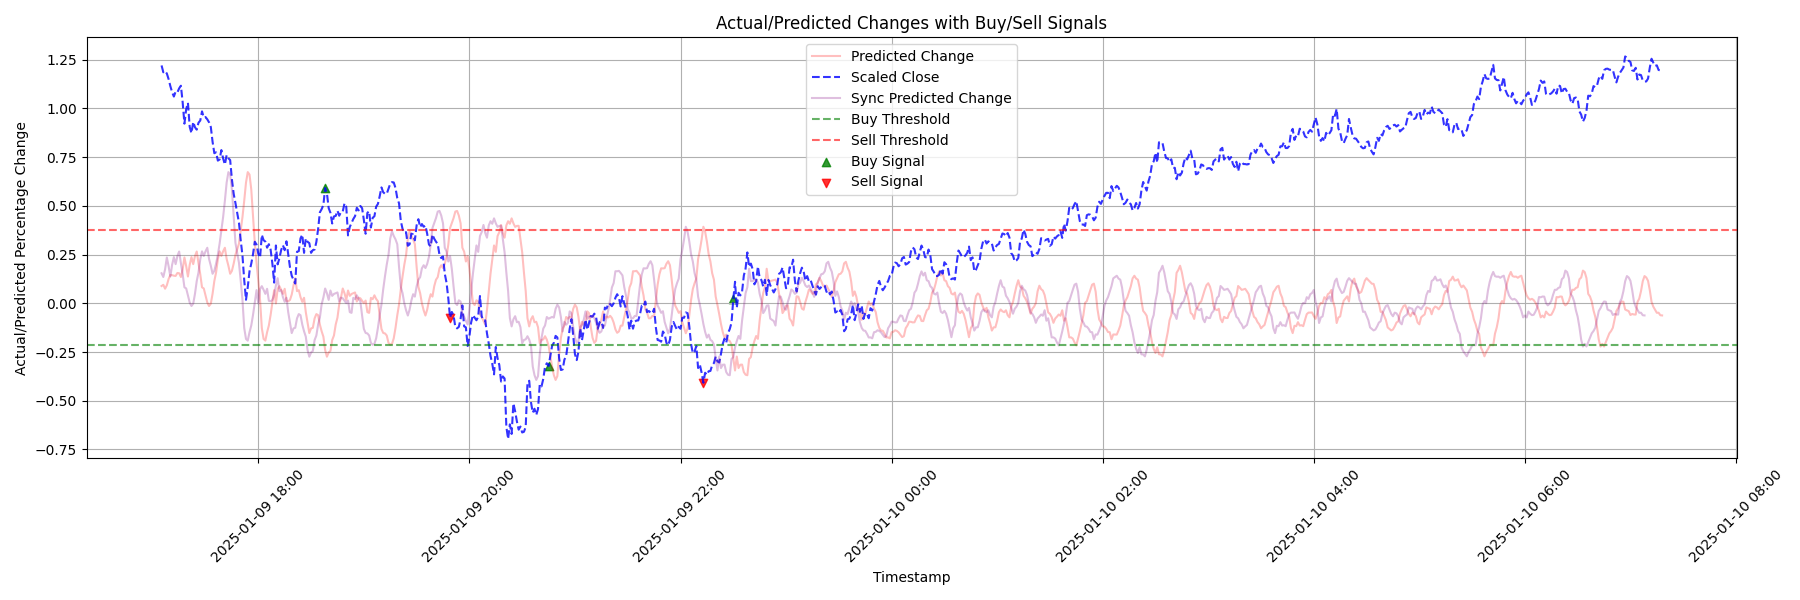

In [ ]:
# Define buy & sell thresholds. Optimal thresholds were finalized after thorough grid-search 
sell_threshold = 0.3751
buy_threshold =  -0.2125565528869623

# Separate buy and sell signals for plotting
buy_signals = log_data[log_data['Trade Action'] == 'Buy']
sell_signals = log_data[log_data['Trade Action'] == 'Sell']

plt.clf()
plt.figure(figsize=(18, 6))

# Plot predicted percentage changes
# plt.plot(log_data['Timestamp'], log_data['Actual Change'], label='Actual Change', color='purple', alpha=0.25)
plt.plot(log_data['Timestamp'], log_data['Predicted Change'], label='Predicted Change', color='red', alpha=0.25)
plt.plot(log_data['Timestamp'], log_data['Scaled Close'], label='Scaled Close', color='blue', linestyle='--', alpha=0.8)

# Add buy and sell thresholds
plt.axhline(y=buy_threshold, color='green', linestyle='--', label='Buy Threshold', alpha=0.6)
plt.axhline(y=sell_threshold, color='red', linestyle='--', label='Sell Threshold', alpha=0.6)

# Plot buy signals
plt.scatter(
    buy_signals['Timestamp'],
    buy_signals['Scaled Close'],
    color='green',
    marker='^',
    label='Buy Signal',
    alpha=0.8
)

# Plot sell signals
plt.scatter(
    sell_signals['Timestamp'],
    sell_signals['Scaled Close'],
    color='red',
    marker='v',
    label='Sell Signal',
    alpha=0.8
)

# Add labels, legend, and format the x-axis
plt.xlabel("Timestamp")
plt.ylabel("Actual/Predicted Percentage Change")
plt.title("Actual/Predicted Changes with Buy/Sell Signals")
plt.legend()

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.grid()

# Show plot
plt.show()

Swap all the logic

In [83]:
log_data[log_data['Trade Action'].isin(['Buy', 'Sell'])].head()

,Timestamp,Close,Predicted Change,Predicted Value,EMA_5,EMA_10,Target,Signal,Trade Action,Trade Price,Position (BTC),Balance,Actual Change,Scaled Close
92,2025-01-09 18:38:00,93230.94,-0.240023,-0.240023,93072.013070,92966.199677,-0.257311,Buy,Buy,93230.94,0.005363,0.000000,-0.466519,0.591455
163,2025-01-09 19:49:00,92183.25,0.386222,0.386222,92399.789015,92535.243896,0.405176,Sell,Sell,92183.25,0.000000,494.381211,0.728571,-0.073579
219,2025-01-09 20:45:00,91792.23,-0.217140,-0.217140,91738.433190,91656.572781,-0.200464,Buy,Buy,91792.23,0.005386,0.000000,-0.318709,-0.321784
306,2025-01-09 22:13:00,91656.88,0.392615,0.392615,91771.985412,91864.978787,0.389936,Sell,Sell,91656.88,0.000000,493.652233,0.619932,-0.407699
323,2025-01-09 22:30:00,92330.00,-0.282172,-0.282172,92150.111436,92054.125065,-0.310867,Buy,Buy,92330.00,0.005347,0.000000,-0.499653,0.019572


In [84]:
log_data.tail()

,Timestamp,Close,Predicted Change,Predicted Value,EMA_5,EMA_10,Target,Signal,Trade Action,Trade Price,Position (BTC),Balance,Actual Change,Scaled Close
844,2025-01-10 07:14:00,94217.45,-0.033605,-0.033605,94209.863497,94189.197086,-0.036816,Hold,NaN,NaN,0.005347,0.0,-0.116836,1.217654
845,2025-01-10 07:15:00,94221.98,-0.048762,-0.048762,94213.902331,94195.157616,-0.041453,Hold,NaN,NaN,0.005347,0.0,-0.078644,1.220530
846,2025-01-10 07:16:00,94184.45,-0.048416,-0.048416,94204.084887,94193.210777,-0.038965,Hold,NaN,NaN,0.005347,0.0,-0.043797,1.196707
847,2025-01-10 07:17:00,94181.82,-0.061373,-0.061373,94196.663258,94191.139726,-0.062128,Hold,NaN,NaN,0.005347,0.0,-0.086843,1.195038
848,2025-01-10 07:18:00,94172.10,-0.062285,-0.062285,94188.475506,94187.677958,-0.072377,Hold,NaN,NaN,0.005347,0.0,-0.085907,1.188868
